In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
titanic_df = pd.read_csv('titanic/train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

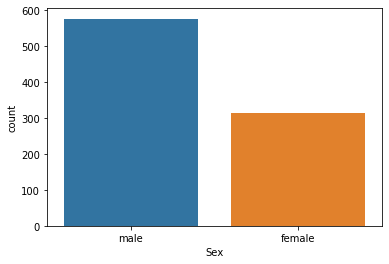

In [8]:
sns.countplot('Sex', data=titanic_df)

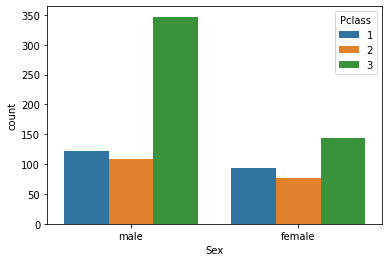

In [9]:
sns.countplot('Sex', data=titanic_df, hue='Pclass')

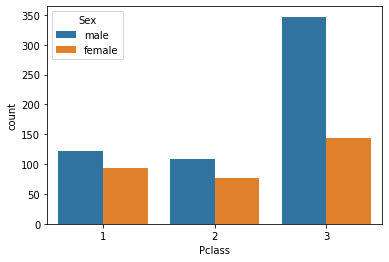

In [10]:
sns.countplot('Pclass', data=titanic_df, hue='Sex')

In [15]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else :
        return sex

In [16]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [18]:
titanic_df[titanic_df['Age'] < 16].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child


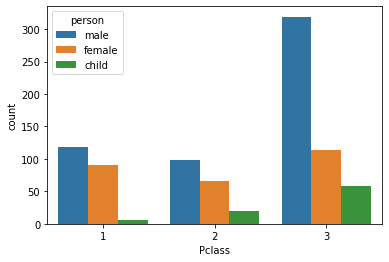

In [19]:
sns.countplot('Pclass', data=titanic_df, hue='person')

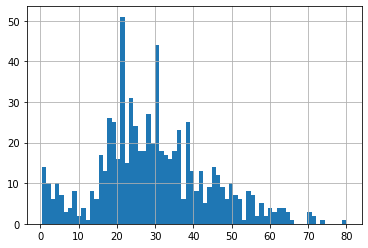

In [20]:
titanic_df['Age'].hist(bins=70)

In [21]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

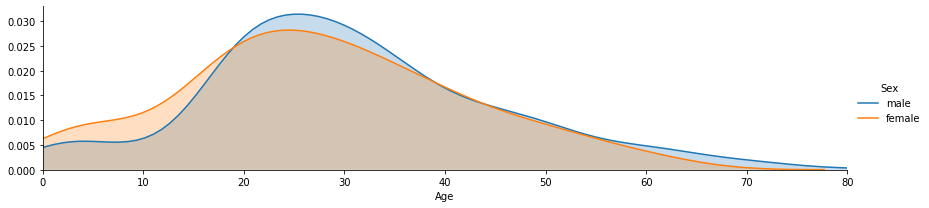

In [24]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

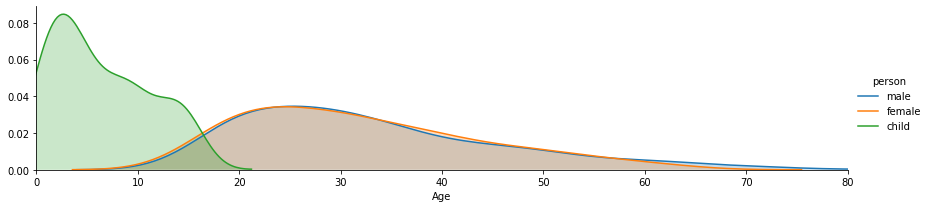

In [25]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

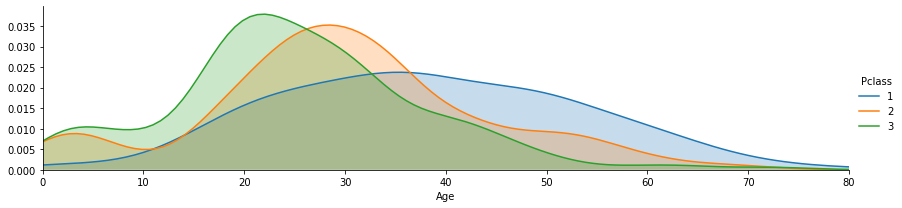

In [26]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [28]:
deck = titanic_df['Cabin'].dropna()

In [31]:
levels = []
for level in deck:
    levels.append(level[0])

In [33]:
cabin_df = DataFrame(levels, columns=['Cabin'])

In [34]:
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


In [43]:
sorted(set(levels))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

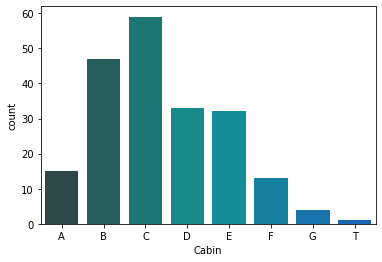

In [44]:
sns.countplot('Cabin', data=cabin_df, palette='winter_d', order=sorted(set(levels)))

In [45]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

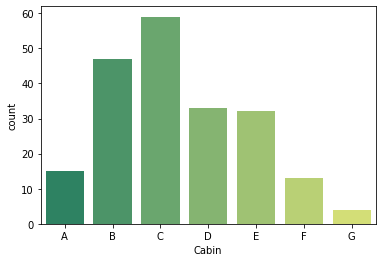

In [48]:
sns.countplot('Cabin', data=cabin_df, palette='summer', order=sorted(set(cabin_df.Cabin)))

In [50]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

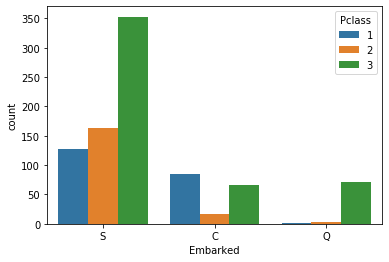

In [52]:
sns.countplot('Embarked', data=titanic_df, hue='Pclass')

In [53]:
from collections import Counter

In [54]:
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [55]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [57]:
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp

In [58]:
titanic_df.Alone

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [59]:
titanic_df['Alone'].loc[titanic_df.Alone>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df.Alone==0] = 'Alone'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
titanic_df.Alone.head()

0    With Family
1    With Family
2          Alone
3    With Family
4          Alone
Name: Alone, dtype: object

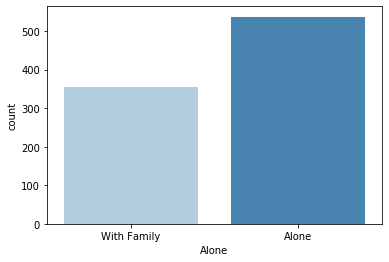

In [63]:
sns.countplot('Alone', data=titanic_df, palette='Blues')

In [64]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [65]:
titanic_df.Survivor.head()

0     no
1    yes
2    yes
3    yes
4     no
Name: Survivor, dtype: object

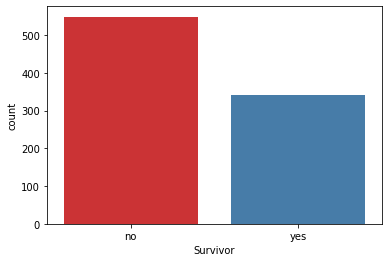

In [66]:
sns.countplot('Survivor', data=titanic_df, palette='Set1')

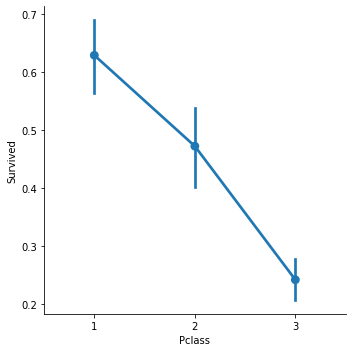

In [70]:
sns.catplot('Pclass', 'Survived', data=titanic_df, order=[1,2,3], kind='point')

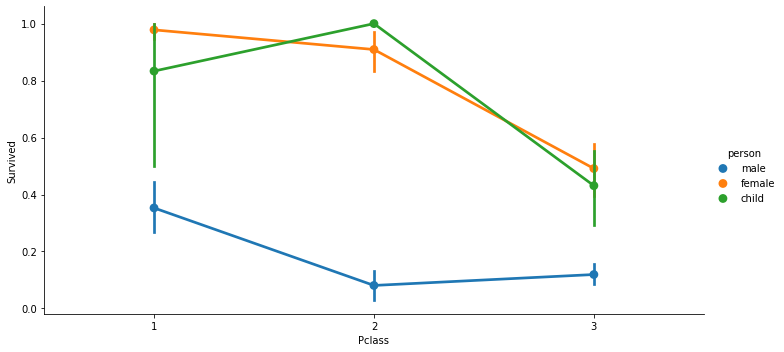

In [73]:
sns.catplot('Pclass', 'Survived', hue='person', data=titanic_df, order=[1,2,3], kind='point', aspect=2)

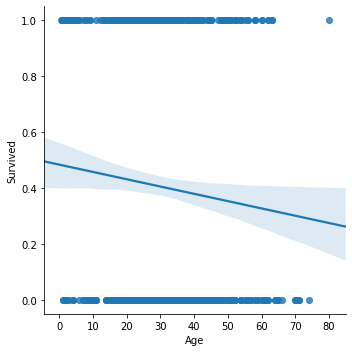

In [74]:
sns.lmplot('Age', 'Survived', data=titanic_df)

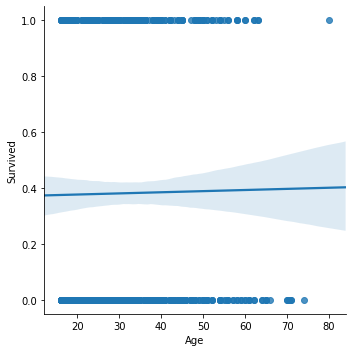

In [75]:
sns.lmplot('Age', 'Survived', data=titanic_df[titanic_df['person']!='child'])

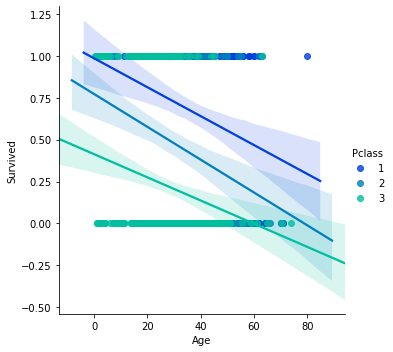

In [79]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', hue_order=[1,2,3])

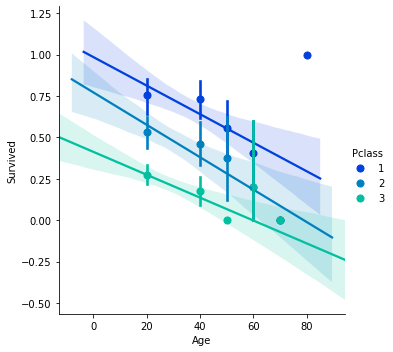

In [85]:
generations = [20,40,50,60,70,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', 
           hue_order=[1,2,3], x_bins=generations)

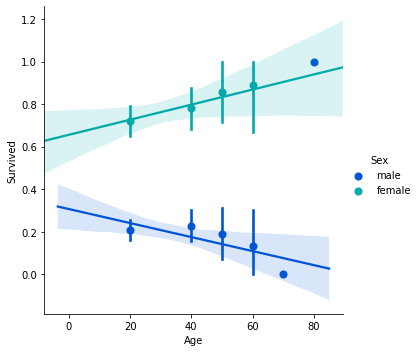

In [86]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', 
           x_bins=generations)

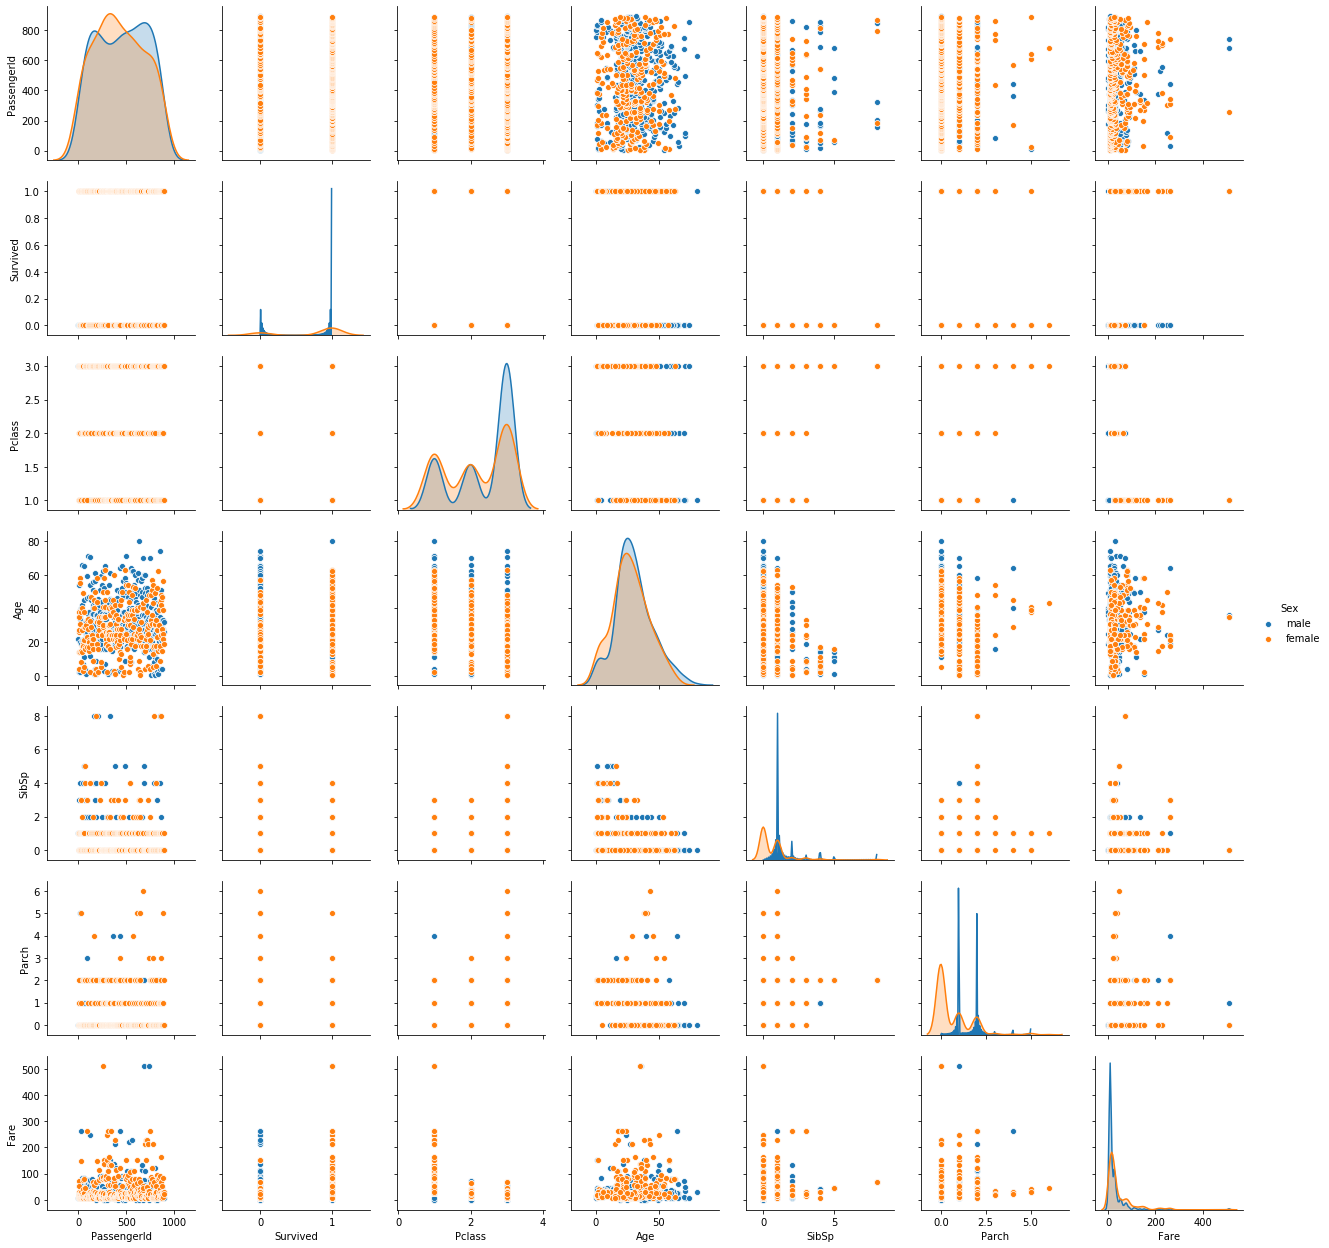

In [89]:
sns.pairplot(titanic_df, hue='Sex', height=2.5)